In [167]:
import pandas as pd
import numpy as np

data = pd.read_csv("FIFA.csv")
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


1. fifa데이터에서 각 선수의 키는 height변수에 피트와 인치로 입력되어 있습니다. 이를 cm로 변환하여 새로운 변수 height_cm를 생성하시오.

In [168]:
data['Height_cm'] = pd.to_numeric(data['Height'].str[:1])*30 + pd.to_numeric(data['Height'].str[2:])*2.5
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5


2. 포지션을 의미하는 Position변수를 아래 표를 참고하여 "Forward", "Midfielder", "Defender", "GoalKeeper" 로 재범주화하고, factor형으로 변환하여 Position_Class라는 변수를 생성하고 저장하시오.

In [35]:
data["Position_Class"] = ""

Forward = ['LS','ST','RS','LW','LF','CF','RF','RW']
MidFielder = ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
Defender = ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
GoalKeeper = ['GK']

for i in range(len(data)):
    if data['Position'][i] in Forward:
        data["Position_Class"][i] = 'Forward'
        
    elif data['Position'][i] in MidFielder:
        data["Position_Class"][i] = 'MidFielder'
        
    elif data['Position'][i] in Defender:
        data["Position_Class"][i] = 'Defender'
        
    elif data['Position'][i] in GoalKeeper:
        data["Position_Class"][i] = 'GoalKeeper'
        

        
data.head()

<ipython-input-35-b3c7d285a7f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Position_Class"][i] = 'Forward'
<ipython-input-35-b3c7d285a7f3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Position_Class"][i] = 'GoalKeeper'
<ipython-input-35-b3c7d285a7f3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Position_Class"][i] = 'MidFielder'
<ipython-input-35-b3c7d285a7f3>:16: SettingWithCopyWarning: 
A value is t

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,MidFielder


In [36]:
data['Position_Class'].value_counts()

Defender      6763
MidFielder    4935
Forward       3044
GoalKeeper    1900
Name: Position_Class, dtype: int64

3. 새로 생성한 Position_Class 변수의 각 범주에 따른 Value 변수 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. (데이터는 등분산성을 만족한다고 가정) 그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오

- 귀무가설 : k개의 집단 간 모평균에는 차이가 없다. 
- 대립가설 : K개의 집단 간 모평균이 모두 같다고는 할 수 없다. 

In [38]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from scipy import stats

anova = smf.ols(formula = 'Value~Position_Class',data = data)
anova_fit = anova.fit()

anova_table = sm.stats.anova_lm(anova_fit,typ=2)
print(anova_table)

                      sum_sq       df          F        PR(>F)
Position_Class  4.081181e+09      3.0  41.873906  5.988667e-27
Residual        5.405330e+11  16638.0        NaN           NaN


p-value값이 0.05보다 작아 귀무가설 기각 -> 사후검정 필요

In [45]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats


#투키의 HSD (유의미한 차이 분석)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['Value'],data['Position_Class'],alpha=0.05)
print(hsd.summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
  Defender    Forward    930.373  0.001   610.7429  1250.0031   True
  Defender GoalKeeper  -507.3848 0.0034  -887.6261  -127.1436   True
  Defender MidFielder   760.8787  0.001   486.7123   1035.045   True
   Forward GoalKeeper -1437.7579  0.001 -1865.9234 -1009.5923   True
   Forward MidFielder  -169.4944 0.5609  -506.9991   168.0104  False
GoalKeeper MidFielder  1268.2635  0.001   872.8782  1663.6488   True
--------------------------------------------------------------------


Forward-MidFielder의 P-value값만이 0.5609로 크게 나옴 -> 유의미한 차이x

Forward-MidFielder를 제외한 모든 변수들에 유의미한 차이가 존재한다고 판단

In [47]:
#봉페로니 교정

comp = MultiComparison(data.Value,data.Position_Class)
result = comp.allpairtest(scipy.stats.ttest_ind, method = 'bonf')
print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
  group1     group2     stat   pval  pval_corr reject
-----------------------------------------------------
  Defender    Forward -7.5605    0.0       0.0   True
  Defender GoalKeeper  4.3687    0.0    0.0001   True
  Defender MidFielder -7.7774    0.0       0.0   True
   Forward GoalKeeper  7.3512    0.0       0.0   True
   Forward MidFielder  1.0839 0.2784       1.0  False
GoalKeeper MidFielder -8.1168    0.0       0.0   True
-----------------------------------------------------


본페로니 방법: 유의수준 0.05를 비교하는 개수로 나누어 줍니다.

가령 3개의 그룹을 비교한다면 3개의 짝이 만들어지게 됩니다.

0.05/3=약 0.017

따라서 검정을 할 때 각 군에 대해서 유의수준 0.017을 기준으로 하게 됩니다.

Forward-MidFielder의 P-value값만이 0.2784로 크게 나옴 -> 유의미한 차이x

4. Preferred Foot과 Position_Class 변수에 따라 Value의 차이가 있는지를 알아보기 위해 이원 배치 분산 분석을 수행하고, 결과를 해석하시오

귀무가설
- Preferred Foot 변수에 따른 Value 값 에는 차이가 없다. 
- Position_Class 변수에 따른 Value 값에는 차이가 없다. 
- Preferred Foot과 Position_Class변수의 상호작용 효과가 없다. 

대립가설
- Preferred Foot 변수에 따른 Value 값 에는 차이가 있다. 
- Position_Class 변수에 따른 Value 값에는 차이가 있다. 
- Preferred Foot과 Position_Class변수의 상호작용 효과가 있다. 

In [49]:
anova2 = smf.ols(formula='Value~Preferred_Foot*Position_Class',data = data).fit()
sm.stats.anova_lm(anova2)

,df,sum_sq,mean_sq,F,PR(>F)
Preferred_Foot,1.0,1.460850e+08,1.460850e+08,4.500734,3.389505e-02
Position_Class,3.0,4.087367e+09,1.362456e+09,41.975902,5.151392e-27
Preferred_Foot:Position_Class,3.0,4.736156e+08,1.578719e+08,4.863874,2.207249e-03
Residual,16634.0,5.399071e+11,3.245805e+07,NaN,NaN


- Preferred_Foot의 p-value값은 매우 작게 나와 귀무가설 기각 -> Value값에 영향을 미친다고 판단
- Position_Value의 p-value값은 매우 작게 나와 귀무가설 기각 -> Value값에 영향을 미친다고 판단
- Preferred_Foot:Position_Class의 p-value값 또한 매우 작게 나와 귀무가설 기각 -> 두 변수는 각 변수가 Value에 끼치는 영향도의 크기에 상호 영향을 미친다고 판단

5. Age, Overall, Wage, Height_cm, Weight_lb가 Value에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [113]:
import statsmodels.api as sm

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return{"model":regr, "AIC":AIC}


In [124]:
#전진 선택법
def forward(X,y,predictors):
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X,y=y, feature_set = predictors+[p]+['const']))
        
    models = pd.DataFrame(results)
    
    #AIC가 가장 낮은 것 선택
    best_model = models.loc[models['AIC'].argmin()]
    print("Selected predictions : ",best_model['model'].model.exog_names,"AIC: ",best_model[0])
    return best_model

In [123]:
X.columns.difference(['const'])

Index(['Age', 'Height_cm', 'Overall', 'Wage', 'Weight_lb'], dtype='object')

In [125]:
#전진 선택법 모델
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=['AIC','model'])
    
    predictors = []
    
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors = predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
            Fmodels.loc[i] = Forward_result
            predictors = Fmodels.loc[i]['model'].model.exog_names
            Fmodel_before = Fmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k!='const']
            
        return(Fmodel['model'][len(Fmodels['model'])])

In [126]:
print(forward_model(X,y).summary())

KeyError: "['const'] not in index"

In [116]:
#후진 선택법
import itertools
def backword(X,y,predictors):
    results = []
    
    for combo in itertools.conbinations(predictors,len(predictors)-1):
        results.append(processSubset(X=X,y=y,feature_set = list(combo)+['const']))
    models = pd.DataFrame(results)
    
    #AIC가 가장 낮은 것 선택
    best_model = models.loc[models['AIC'].argmin()]
    
    print("Selected predictors : ",best_model['model'].model.exog_names,
         'AIC:',best_model[0])

In [110]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=['AIC','model'])
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    for i in range(1,len(X.columns.differences(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors = predictors)
        Stepmodels.loc[i] = Forward_result
        
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k!= 'const']
        Backward_result = backword(X=X,y=y,predictors=predictors)
        
        if Backward_result['AIC']<Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].moel.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k!='const']
            print('backward')
            
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
            
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
    return Stepmodels['model'][len(Stepmodels['model'])]

In [135]:
import numpy as np
X = data[['Age','Overall','Wage','Height_cm','Weight_lb']]
y = data[['Value']]

print(Stepwise_model(X,y).summary())

KeyError: "None of [Index(['const'], dtype='object')] are in the [columns]"

In [148]:
variables = data[['Age','Overall','Wage','Height_cm','Weight_lb']].columns.tolist()
y = data['Value']

#선택된 변수들
selected_variables = []
sl_enter = 0.05
sl_remove = 0.05

#각 스텝별 선택 변수
sv_per_step = []
#수정된 결정계수
adjusted_r_squared = []
#스텝
steps = []
step = 0

while len(variables)>0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = data[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-148-7f4181b46a22>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-148-7f4181b46a22>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-148-7f4181b46a22>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-148-7f4181b46a22>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [149]:
selected_variables

['Wage', 'Overall', 'Age', 'Height_cm']

In [166]:
data['Wage'] = data['Wage'].astype('float64')
data['Overall'] = data['Overall'].astype('float64')
data['Age'] = data['Age'].astype('float64')
data['Height_cm'] = data['Height_cm'].astype('float64')
data['Value'] = data['Value'].astype('float64')

reg = sm.OLS('Value~Wage+Overall+Age+Height_cm',data=data).fit()
anova_lm(reg)
reg.summary2()

ValueError: unrecognized data structures: <class 'str'> / <class 'NoneType'>

In [162]:
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31.0,Argentina,94.0,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565.0,167.5,Forward
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405.0,185.0,Forward
2,190871,Neymar Jr,26.0,Brazil,92.0,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290.0,172.5,Forward
3,193080,De Gea,27.0,Spain,91.0,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260.0,190.0,GoalKeeper
4,192985,K. De Bruyne,27.0,Belgium,91.0,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355.0,177.5,MidFielder


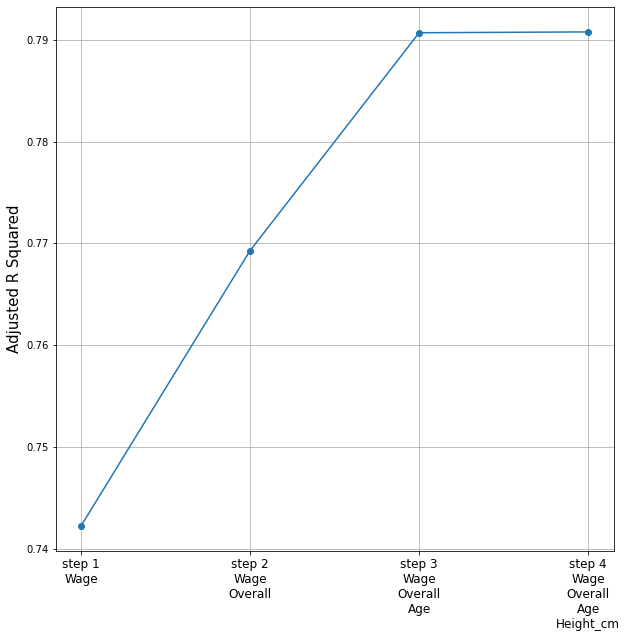

In [150]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()